In [ ]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
import math
#!pip install xgboost
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LinearRegression, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score, KFold, RepeatedKFold, learning_curve
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor

#LOAD DATA

In [ ]:
df = pd.read_csv('Maths.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
# Backup data set

df1 = df.copy()

In [ ]:
df.shape

(395, 33)

**Let's understand the column**


---



(sex) student’s sex (binary: ‘F’ - female or ‘M’ - male)

(age) student’s age (numeric: from 15 to 22)

(Medu) mother’s education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)

(Fedu) father’s education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)

(Mjob) mother’s job (nominal: ‘teacher’, ‘health’ care related, civil ‘services’ (e.g. administrative or police), ‘at_home’ or ‘other’)

(traveltime) home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

(studytime) weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

(failures) number of past class failures (numeric: n if 1<=n<3, else 4)

(schoolsup) extra educational support (binary: yes or no)

(paid)  extra paid classes within the course subject (Portuguese) (binary: yes or no)

(romantic) with a romantic relationship (binary: yes or no)

(famrel) quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

(freetime) free time after school (numeric: from 1 - very low to 5 - very high)

(goout)  going out with friends (numeric: from 1 - very low to 5 - very high)

(Dalc) workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

(Walc)  weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

(health) current health status (numeric: from 1 - very bad to 5 - very good)

(absences) number of school absences (numeric: from 0 to 93)

(G1) first period grade (numeric: from 0 to 20)

(G2) second period grade (numeric: from 0 to 20)

(G3) final grade (numeric: from 0 to 20, output target)

**On this project, we only focus on G3 as a target**

In [ ]:
df = df.drop(columns = ['G1','G2'])

# DATA CLEANSING

## Drop Duplicated Value

In [ ]:
df.duplicated().sum()

0

**There is no duplicated row on this data set**

## Drop Missing Value

In [ ]:
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G3            0
dtype: int64

In [ ]:
df['school'].value_counts()

GP    349
MS     46
Name: school, dtype: int64

In [ ]:
# Checking Missing Value based on distinct
for column in df.columns:
    print(f"============= {column} =================")
    display(df[column].value_counts())
    print()

============= school =================


GP    349
MS     46
Name: school, dtype: int64


============= sex =================


F    208
M    187
Name: sex, dtype: int64


============= age =================


16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64


============= address =================


U    307
R     88
Name: address, dtype: int64


============= famsize =================


GT3    281
LE3    114
Name: famsize, dtype: int64


============= Pstatus =================


T    354
A     41
Name: Pstatus, dtype: int64


============= Medu =================


4    131
2    103
3     99
1     59
0      3
Name: Medu, dtype: int64


============= Fedu =================


2    115
3    100
4     96
1     82
0      2
Name: Fedu, dtype: int64


============= Mjob =================


other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64


============= Fjob =================


other       217
services    111
teacher      29
at_home      20
health       18
Name: Fjob, dtype: int64


============= reason =================


course        145
home          109
reputation    105
other          36
Name: reason, dtype: int64


============= guardian =================


mother    273
father     90
other      32
Name: guardian, dtype: int64


============= traveltime =================


1    257
2    107
3     23
4      8
Name: traveltime, dtype: int64


============= studytime =================


2    198
1    105
3     65
4     27
Name: studytime, dtype: int64


============= failures =================


0    312
1     50
2     17
3     16
Name: failures, dtype: int64


============= schoolsup =================


no     344
yes     51
Name: schoolsup, dtype: int64


============= famsup =================


yes    242
no     153
Name: famsup, dtype: int64


============= paid =================


no     214
yes    181
Name: paid, dtype: int64


============= activities =================


yes    201
no     194
Name: activities, dtype: int64


============= nursery =================


yes    314
no      81
Name: nursery, dtype: int64


============= higher =================


yes    375
no      20
Name: higher, dtype: int64


============= internet =================


yes    329
no      66
Name: internet, dtype: int64


============= romantic =================


no     263
yes    132
Name: romantic, dtype: int64


============= famrel =================


4    195
5    106
3     68
2     18
1      8
Name: famrel, dtype: int64


============= freetime =================


3    157
4    115
2     64
5     40
1     19
Name: freetime, dtype: int64


============= goout =================


3    130
2    103
4     86
5     53
1     23
Name: goout, dtype: int64


============= Dalc =================


1    276
2     75
3     26
5      9
4      9
Name: Dalc, dtype: int64


============= Walc =================


1    151
2     85
3     80
4     51
5     28
Name: Walc, dtype: int64


============= health =================


5    146
3     91
4     66
1     47
2     45
Name: health, dtype: int64


============= absences =================


0     115
2      65
4      53
6      31
8      22
10     17
14     12
12     12
3       8
16      7
7       7
5       5
18      5
20      4
11      3
9       3
13      3
15      3
22      3
1       3
38      1
30      1
40      1
23      1
19      1
28      1
75      1
21      1
24      1
56      1
26      1
54      1
25      1
17      1
Name: absences, dtype: int64


============= G3 =================


10    56
11    47
0     38
15    33
8     32
13    31
12    31
9     28
14    27
16    16
6     15
18    12
7      9
5      7
17     6
19     5
20     1
4      1
Name: G3, dtype: int64

**There is no missing value on this data set**

## Outlier Identification

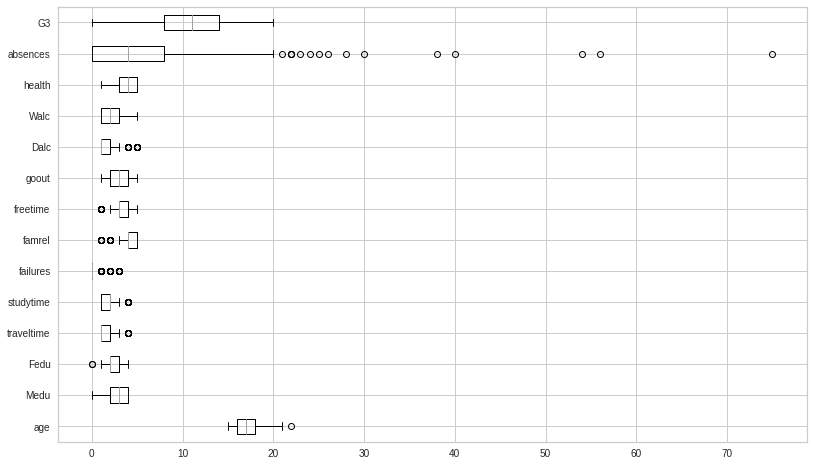

In [ ]:
# Outlier Analysis

plt.figure(figsize=(16, 8))

# Create Boxplot
df.boxplot(vert=False)
plt.subplots_adjust(left=0.25)
plt.show()

* From boxplot above, we can conclude that there is kind of outlier in features age, Fedu,traveltime,studytime,failure,famrel,freetime,Dalc & absences

* Since the value of the outlier is still reasonable and suitable with data dictionary, so no need to handle it specifically

# EXPLORATORY DATA ANALYSIS

## Statistical Summary

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
# First we need to conclude the feature according to its type

numerical = ['age',
 'Medu',
 'Fedu',
  'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences']

categorical = ['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']

In [ ]:
categorical

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [ ]:
numerical

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences']

In [ ]:
# Categorical statistical summary

df[categorical].describe()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,307,281,354,141,217,145,273,344,242,214,201,314,375,329,263


**Observation**

*  Most of the student on this data set is Female
* Most of student dont have extra educational support, dont extra paid classes of Math course and dont have failed on the past class
* Most of them also dont have romantic relationship
* Most of the students are living together with their parents, many of them also live in urban city, have internet connection and want to take higher education


In [ ]:
#numerical statistical summary

df[numerical].describe().round(2)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
count,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00
mean,16.70,2.75,2.52,1.45,2.04,0.33,3.94,3.24,3.11,1.48,2.29,3.55,5.71
std,1.28,1.09,1.09,0.70,0.84,0.74,0.90,1.00,1.11,0.89,1.29,1.39,8.00
min,15.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00
25%,16.00,2.00,2.00,1.00,1.00,0.00,4.00,3.00,2.00,1.00,1.00,3.00,0.00
50%,17.00,3.00,2.00,1.00,2.00,0.00,4.00,3.00,3.00,1.00,2.00,4.00,4.00
75%,18.00,4.00,3.00,2.00,2.00,0.00,5.00,4.00,4.00,2.00,3.00,5.00,8.00
max,22.00,4.00,4.00,4.00,4.00,3.00,5.00,5.00,5.00,5.00,5.00,5.00,75.00


**Observation**

* G3 is target variable for medeling since it is the final score of student in final grade
* The youngest student is 15 and the oldest is 22 years old
* As we can see, the maximum score of each column has big range. This is one of our consideration to do standardization before use the data for modeling.

## Multivariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

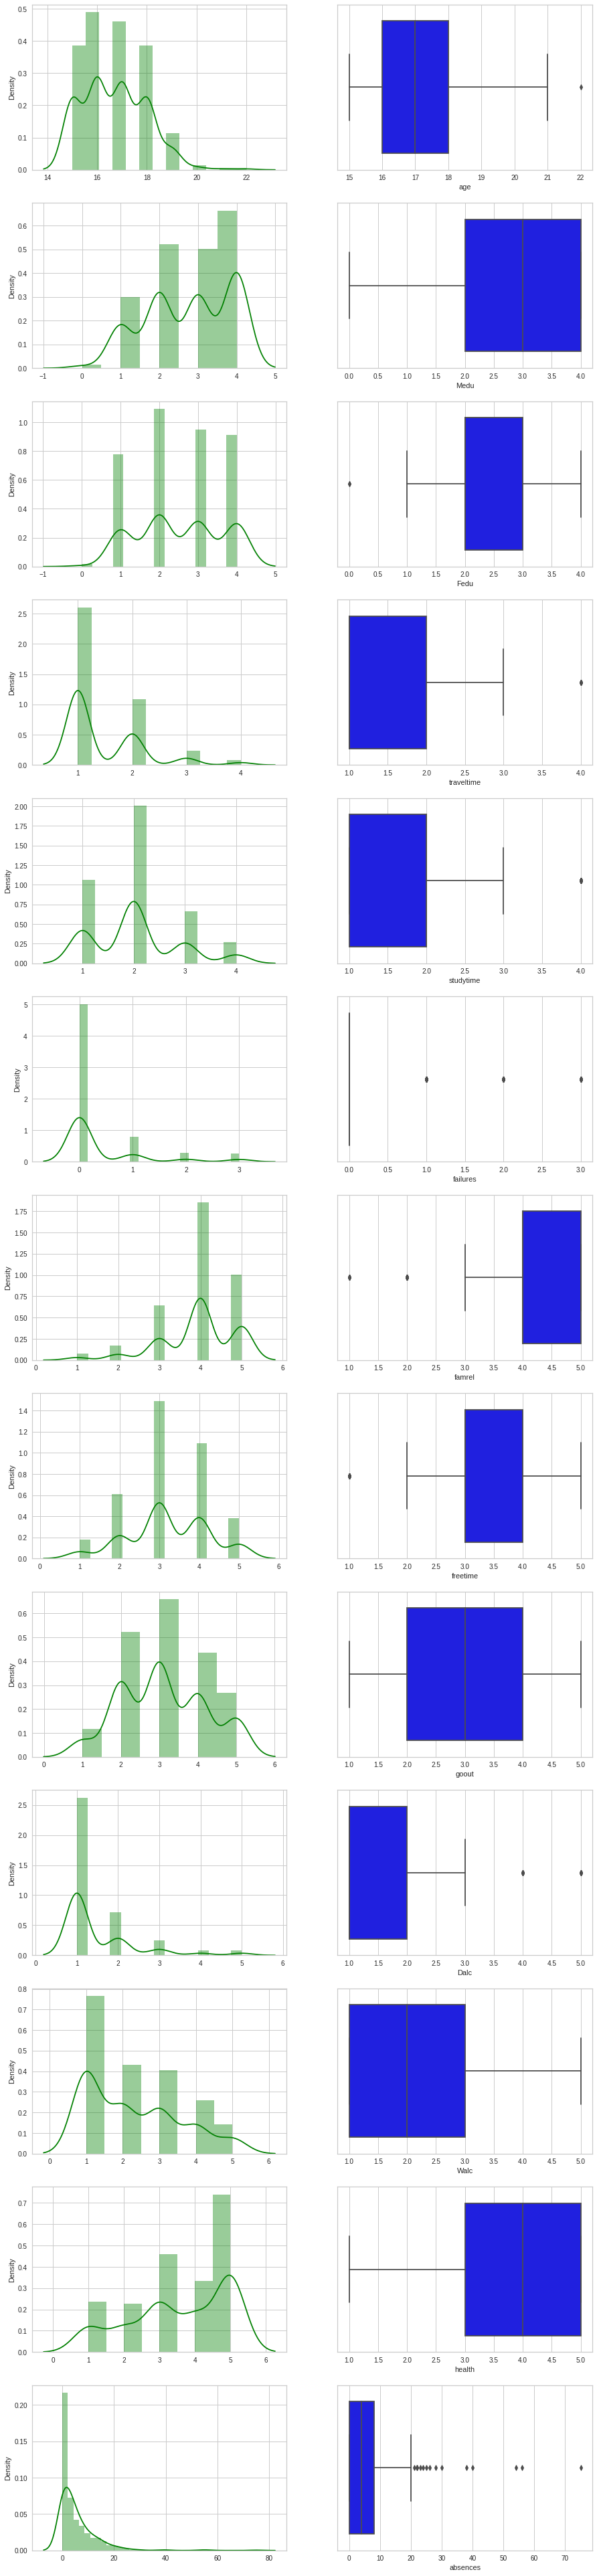

In [ ]:
features = numerical
fig, ax = plt.subplots(len(features),2,figsize=(15,70))
for idx, column in enumerate(features):
    sns.distplot(
        x=df[column], 
        color='green', 
        ax=ax[idx][0])
    sns.boxplot(
        x=df[column],
        color='blue',
        ax=ax[idx][1]
        )


* Most of them have 2-5 hours of weekly study time, though most of them never got failure on past class
* They have middle to high free time after school because most of them only take less than 15 minutes to go to school. It might cause they have good quality relationship with their family and also have much time to go out with friends.
* Most of them have low workday and weekly alcohol consumption and they have good health
* Most of them are good in school presence

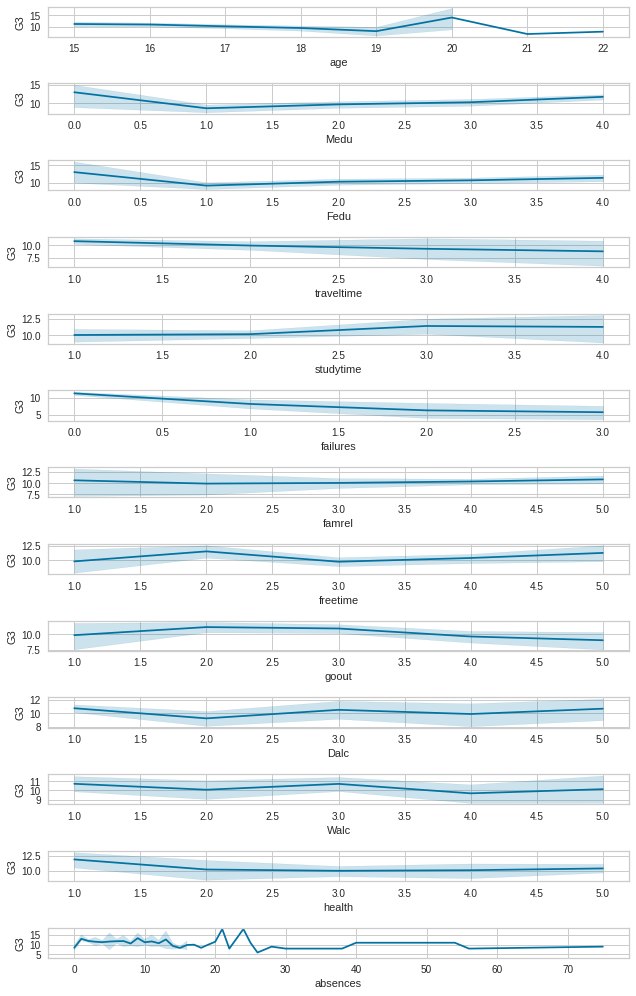

In [ ]:
X_feature = ['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences']
X_index = list(range(len(X_feature)))
fig, ax = plt.subplots(13,1,figsize=(9,14))
for i in X_index:
    sns.lineplot(data=df, x = X_feature[i], y = 'G3', ax=ax[i])
    plt.tight_layout()

### G3 x Dalc x Walc

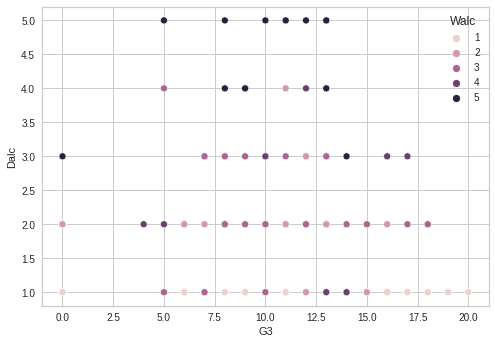

In [ ]:
sns.scatterplot (x = df['G3'],
                y = df['Dalc'],hue = df["Walc"])

* Most students who have very high weekday and weekend alcohol consumption have less score  in G3

* Those who has very low weekday and weekend alcohol consumption have higher score inG3

### G3 x failure x schoolup

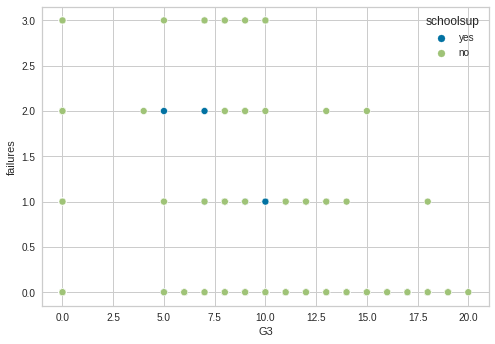

In [ ]:
sns.scatterplot(x = df['G3'],
                y = df['failures'],hue=df['schoolsup'])

*  Most of student dont have extra educational support
* Those who have extra educational support got failed on past class and got less score in G3

### G3 x absences x health

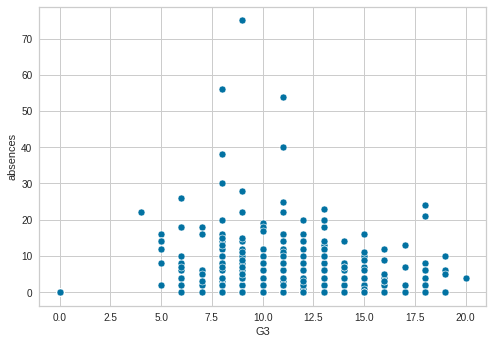

In [ ]:
sns.scatterplot(x = df['G3'],
                y = df['absences'])

* Most student who got higher score in G3 have lower number of school absences

* Student with high number of school absences got middle to low grade in G3

# FEATURE ENGINEERING




## Check Multicollinearity

In [ ]:
# define feature and target
feature_x = df[numerical]
target_Y = df[['G3']]

### VIF Score

In [ ]:
# Calculate VIF score for each feature

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = add_constant(feature_x)

vif_df = pd.DataFrame([vif(X.values, i)
            for i in range(X.shape[1])],
            index = X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,feature,vif_score
1,age,1.156567
2,Medu,1.751830
3,Fedu,1.706028
4,traveltime,1.068354
5,studytime,1.132556
6,failures,1.196068
7,famrel,1.075434
8,freetime,1.182465
9,goout,1.354453
10,Dalc,1.808935


**NO feature has VIF value > 4**

### Heatmap Correlation

<function matplotlib.pyplot.show(*args, **kw)>

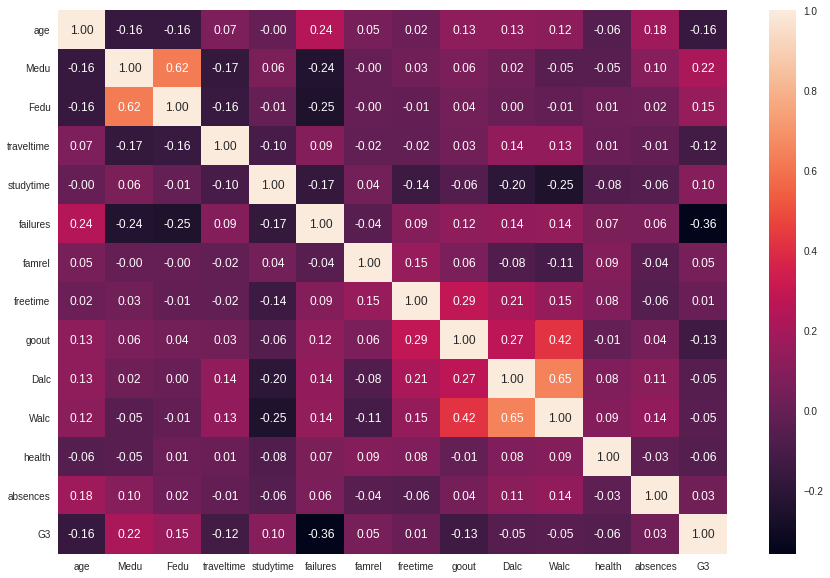

In [ ]:
# heatmap correlation

data = pd.concat([feature_x, target_Y], axis=1)
corr = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show

**No need to drop any features here**

**All is good !**

## Categorical column transformation


### One Hot Encoding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,10


In [ ]:
### Onehot Encoding
onehot_columns = ['romantic','internet','higher','nursery','activities','paid','famsup','schoolsup','guardian','reason','Fjob','Mjob','Pstatus','famsize','address','sex','school']
df = pd.get_dummies(df, columns = onehot_columns)

In [ ]:
df

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G3,romantic_no,romantic_yes,internet_no,internet_yes,higher_no,higher_yes,nursery_no,nursery_yes,activities_no,activities_yes,paid_no,paid_yes,famsup_no,famsup_yes,schoolsup_no,schoolsup_yes,guardian_father,guardian_mother,guardian_other,reason_course,reason_home,reason_other,reason_reputation,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Pstatus_A,Pstatus_T,famsize_GT3,famsize_LE3,address_R,address_U,sex_F,sex_M,school_GP,school_MS
0,18,4,4,2,2,0,4,3,4,1,1,3,6,6,1,0,1,0,0,1,0,1,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,1,3,4,6,1,0,0,1,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1,1,0,1,0
2,15,1,1,1,2,3,4,3,2,2,3,3,10,10,1,0,0,1,0,1,0,1,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,1,0
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,1,0,1,0
4,16,3,3,1,2,0,4,3,2,1,2,5,4,10,1,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0
5,16,4,3,1,2,0,5,4,2,1,2,5,10,15,1,0,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,1,0
6,16,2,2,1,2,0,4,4,4,1,1,3,0,11,1,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0
7,17,4,4,2,2,0,4,1,4,1,1,1,6,6,1,0,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0
8,15,3,2,1,2,0,4,2,2,1,1,1,0,19,1,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,1,0
9,15,3,4,1,2,0,5,5,1,1,1,5,0,15,1,0,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0


# FIND THE BEST LAMDA [0.01, 0.1, 1, 10]

## Split data: train-validation-test

In [ ]:
# split train test
from sklearn.model_selection import train_test_split

feature = df.drop(columns='G3')
target = df[['G3']]

# First splitting: pretrain and test
feature_df_pretrain, feature_df_test, target_df_pretrain, target_df_test = train_test_split(feature, target, test_size=0.20, random_state=42)

# Second splitting: train and validation
feature_df_train, feature_df_validation, target_df_train, target_df_validation = train_test_split(feature_df_pretrain, target_df_pretrain, test_size=0.20, random_state=42)

# RIDGE REGRESSION

##Train Multiple Models
with different alpha (lambda)

In [ ]:
from sklearn.linear_model import Ridge

# train the model
X_df_train = feature_df_train.to_numpy()
y_df_train = target_df_train.to_numpy()
y_df_train = y_df_train.reshape(len(y_df_train),)

# define the model
# 4 models with 4 different alphas (lambda)
ridge_reg_pointzeroone = Ridge(alpha=0.01, random_state=42)
ridge_reg_pointone = Ridge(alpha=0.1, random_state=42)
ridge_reg_one = Ridge(alpha=1, random_state=42)
ridge_reg_ten = Ridge(alpha=10, random_state=42)

# fit the model (training)
ridge_reg_pointzeroone.fit(X_df_train, y_df_train)
ridge_reg_pointone.fit(X_df_train, y_df_train)
ridge_reg_one.fit(X_df_train, y_df_train)
ridge_reg_ten.fit(X_df_train, y_df_train)

Ridge(alpha=10, random_state=42)

##Find the best model (alpha)

In [ ]:
from sklearn.metrics import mean_squared_error

X_df_validation = feature_df_validation.to_numpy()
y_df_validation = target_df_validation.to_numpy()
y_df_validation = y_df_validation.reshape(len(y_df_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [ridge_reg_pointzeroone,
          ridge_reg_pointone,
          ridge_reg_one,
          ridge_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_df_validation)
    rmse = np.sqrt(mean_squared_error(y_df_validation,y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.01 is 4.484026981644589
RMSE of Ridge regression model with alpha = 0.1 is 4.479665018091902
RMSE of Ridge regression model with alpha = 1.0 is 4.4392973699262805
RMSE of Ridge regression model with alpha = 10 is 4.206985767612565


We can see that Ridge with alpha = 10 has the smallest RMSE --> The best model

## Coefficient

In [ ]:
ridge_best = ridge_reg_ten

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_df_train.columns.tolist(),
    'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
})

coef_df.sort_values(by = ['coefficient'], ascending=False)

,feature,coefficient
0,intercept,16.579642
41,Fjob_teacher,1.007926
54,sex_M,0.917231
32,guardian_other,0.756511
43,Mjob_health,0.742816
19,higher_yes,0.702897
28,schoolsup_no,0.647670
5,studytime,0.573189
26,famsup_no,0.554734
14,romantic_no,0.509626


**From here we can conclude that Father's Job as teacher is the most influential coefficient on the target variable (`G3`)**

## Model Evaluation

###Diagnostic Study

In [ ]:
from sklearn.metrics import r2_score

y_predict_train = ridge_best.predict(X_df_train)

print('R-squared for training data is {}'.format(r2_score(y_df_train, y_predict_train)))

R-squared for training data is 0.3331253150416553


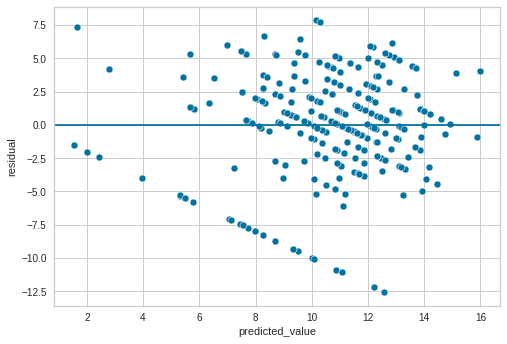

In [ ]:
# calculate residuals
residual = y_df_train - y_predict_train

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'predicted_value': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
# RIDGE

# prepare prediction result on train data
y_predict_train_ridge = ridge_best.predict(X_df_train)

# prepare prediction result on test data
X_df_test = feature_df_test.to_numpy()
y_predict_test_ridge = ridge_best.predict(X_df_test)

# ground truth target
y_df_test = target_df_test.to_numpy()
y_df_test = y_df_test.reshape(len(y_df_test),)

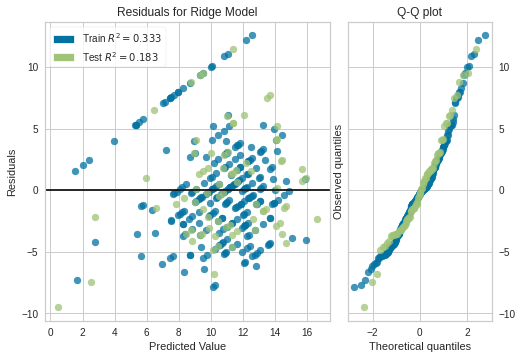

In [ ]:
linear_visualize = ResidualsPlot(ridge_best,hist=False,qqplot=True)
linear_visualize.fit(X_df_train, y_df_train)
linear_visualize.score(X_df_test, y_df_test)
linear_visualize.show();

###Training Error

In [ ]:
# prepare prediction result on train data
y_predict_train = ridge_best.predict(X_df_train)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_df_train, y_predict_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_df_train, y_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_df_train, y_predict_train)))

RMSE for training data is 3.860208683805841
MAE for training data is 2.9292189090683634
MAPE for training data is 3575629583437492.0


### Testing Error

In [ ]:
# prepare prediction result on test data
X_df_test = feature_df_test.to_numpy()
y_predict_test = ridge_best.predict(X_df_test)

# ground truth target
y_df_test = target_df_test.to_numpy()
y_df_test = y_df_test.reshape(len(y_df_test),)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_df_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_df_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_df_test, y_predict_test)))

RMSE for testing data is 4.092336639787497
MAE for testing data is 3.259772216573929
MAPE for testing data is 2596140519901846.0


In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_error(y_df_test, y_predict_test)
mean_absolute_percentage_error(y_df_test, y_predict_test)

2596140519901846.0

# LASSO

## Train Multiple Models

In [ ]:
from sklearn.linear_model import Lasso

# train the model
X_df_train = feature_df_train.to_numpy()
y_df_train = target_df_train.to_numpy()
y_df_train = y_df_train.reshape(len(y_df_train),)

# define the model
# 4 models with 4 different alphas (lambda)
lasso_reg_pointzeroone = Lasso(alpha=0.01, random_state=42)
lasso_reg_pointone = Lasso(alpha=0.1, random_state=42)
lasso_reg_one = Lasso(alpha=1, random_state=42)
lasso_reg_ten = Lasso(alpha=10, random_state=42)

# fit the model (training)
lasso_reg_pointzeroone.fit(X_df_train, y_df_train)
lasso_reg_pointone.fit(X_df_train, y_df_train)
lasso_reg_one.fit(X_df_train, y_df_train)
lasso_reg_ten.fit(X_df_train, y_df_train)

Lasso(alpha=10, random_state=42)

## Find the best model (alpha)

In [ ]:
from sklearn.metrics import mean_squared_error

X_df_validation = feature_df_validation.to_numpy()
y_df_validation = target_df_validation.to_numpy()
y_df_validation = y_df_validation.reshape(len(y_df_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [lasso_reg_pointzeroone,
          lasso_reg_pointone,
          lasso_reg_one,
          lasso_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_df_validation)
    rmse = np.sqrt(mean_squared_error(y_df_validation,y_predict_validation))
    print(f'RMSE of Lasso regression model with alpha = {alpha} is {rmse}')

RMSE of Lasso regression model with alpha = 0.01 is 4.395388749190323
RMSE of Lasso regression model with alpha = 0.1 is 3.9376305791841606
RMSE of Lasso regression model with alpha = 1.0 is 3.899571891882198
RMSE of Lasso regression model with alpha = 10 is 4.009307972957511


We can see that Lasso with alpha = 1.0 has the smallest RMSE --> The best model

## Coefficient

In [ ]:
lasso_best = lasso_reg_one

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_df_train.columns.tolist(),
    'coefficient':[lasso_best.intercept_] + list(lasso_best.coef_)
})

coef_df.sort_values(by = ['coefficient'], ascending=False)

,feature,coefficient
0,intercept,10.685323
2,Medu,0.018225
13,absences,0.016839
43,Mjob_health,0.000000
32,guardian_other,-0.000000
33,reason_course,-0.000000
34,reason_home,-0.000000
35,reason_other,0.000000
36,reason_reputation,0.000000
37,Fjob_at_home,-0.000000


**From here we can conclude that Mother's education  and absences are the most influential coefficient on the target variable (`G3`)**

## Model Evaluation

###Diagnostic Study

In [ ]:
from sklearn.metrics import r2_score

y_predict_train = lasso_best.predict(X_df_train)

print('R-squared for training data is {}'.format(r2_score(y_df_train, y_predict_train)))

R-squared for training data is 0.08040954437489545


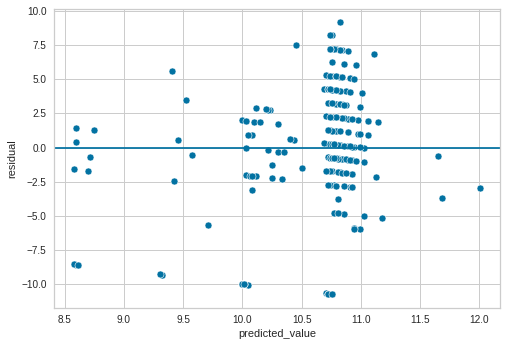

In [ ]:
# calculate residuals
residual = y_df_train - y_predict_train

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'predicted_value': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()

In [ ]:
# prepare prediction result on train data
y_predict_train_lasso = lasso_best.predict(X_df_train)

# prepare prediction result on test data
X_df_test = feature_df_test.to_numpy()
y_predict_test_lasso = lasso_best.predict(X_df_test)

# ground truth target
y_df_test = target_df_test.to_numpy()
y_df_test = y_df_test.reshape(len(y_df_test),)

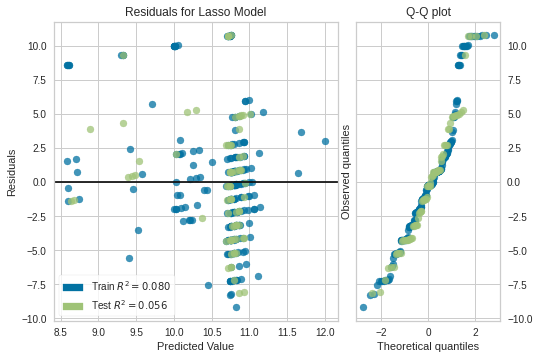

In [ ]:
linear_visualize = ResidualsPlot(lasso_best,hist=False,qqplot=True)
linear_visualize.fit(X_df_train, y_df_train)
linear_visualize.score(X_df_test, y_df_test)
linear_visualize.show();

###Training Error

In [ ]:
# prepare prediction result on training data
y_predict_train = lasso_best.predict(X_df_train)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_df_train, y_predict_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_df_train, y_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_df_train, y_predict_train)))

RMSE for training data is 4.533001837675497
MAE for training data is 3.393904513475747
MAPE for training data is 4809084274648772.0


### Testing Error

In [ ]:
# prepare prediction result on test data
X_df_test = feature_df_test.to_numpy()
y_predict_test = lasso_best.predict(X_df_test)

# ground truth target
y_df_test = target_df_test.to_numpy()
y_df_test = y_df_test.reshape(len(y_df_test),)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_df_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_df_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_df_test, y_predict_test)))

RMSE for testing data is 4.399214614815754
MAE for testing data is 3.4990155519410724
MAPE for testing data is 2978474362085722.5


# CONCLUSION

**Using Ridge regression will generate the best model on this data set (the smallest MAE, MAPE & RMSE)**
